In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
import pandas as pd 
import locale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("./number of travelers.csv")

In [3]:
df.head(5)

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [4]:
df.sample(5)

,month,passengers
183,2015-04-01,65919
101,2008-06-01,67956
127,2010-08-01,66253
198,2016-07-01,76886
96,2008-01-01,57710


# Transformation de la col ‘time’ en format date

In [6]:
df["month"] = pd.to_datetime(df["month"])
print(df.dtypes)
print(df.head(4))  


month         datetime64[ns]
passengers             int64
dtype: object
       month  passengers
0 2000-01-01       46492
1 2000-02-01       48526
2 2000-03-01       58764
3 2000-04-01       56033


# Extraction du nom du mois sur une nouvelle Colonne soit <<month_name>>

In [8]:
# Définir la localisation en français
locale.setlocale(locale.LC_TIME, 'fr_FR')

df["month_name"] = df["month"].dt.strftime('%B')

In [9]:
df.sample(12)

,month,passengers,month_name
135,2011-04-01,60531,avril
73,2006-02-01,53350,février
113,2009-06-01,63576,juin
149,2012-06-01,66609,juin
139,2011-08-01,66299,août
87,2007-04-01,64884,avril
95,2007-12-01,60837,décembre
127,2010-08-01,66253,août
54,2004-07-01,67097,juillet
223,2018-08-01,80988,août


# transformer la nouvelle colonne(‘month_name’) grâce au one-hot encoding en utilisant la méthode pd.get_dummies

In [24]:
# Effectuer le one-hot encoding sur la colonne 'month_name'
one_hot_encoded = pd.get_dummies(df['month_name'])

# Concaténer les colonnes one-hot encodées avec le DataFrame d'origine
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
print(df_encoded.head(4))

       month  passengers month_name   août  avril  décembre  février  janvier   
0 2000-01-01       46492    janvier  False  False     False    False     True  \
1 2000-02-01       48526    février  False  False     False     True    False   
2 2000-03-01       58764       mars  False  False     False    False    False   
3 2000-04-01       56033      avril  False   True     False    False    False   

   juillet   juin    mai   mars  novembre  octobre  septembre  
0    False  False  False  False     False    False      False  
1    False  False  False  False     False    False      False  
2    False  False  False   True     False    False      False  
3    False  False  False  False     False    False      False  


# Débutons la regression Linéaire

## Normalisation de nos données

In [46]:
scaler = StandardScaler()

df_encoded["passengers"] = scaler.fit_transform(df_encoded[["passengers"]])

df_encoded["passengers"] = df_encoded["passengers"].values.reshape(-1, 1)



# Train_Test_Split

In [62]:

# Diviser les données normalisées en ensembles d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(["month", "passengers", "month_name"], axis=1), df_encoded["passengers"], test_size=0.2, random_state=0)


# Linear Regression

In [68]:
# Créer une instance de LinearRegression
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

print(len(X_train))
print(len(y_train))

print(X_train.shape)
print(y_train.shape)

y_train = y_train.reshape(-1, 1)


192
192
(192, 12)
(192, 1)


ValueError: x and y must be the same size

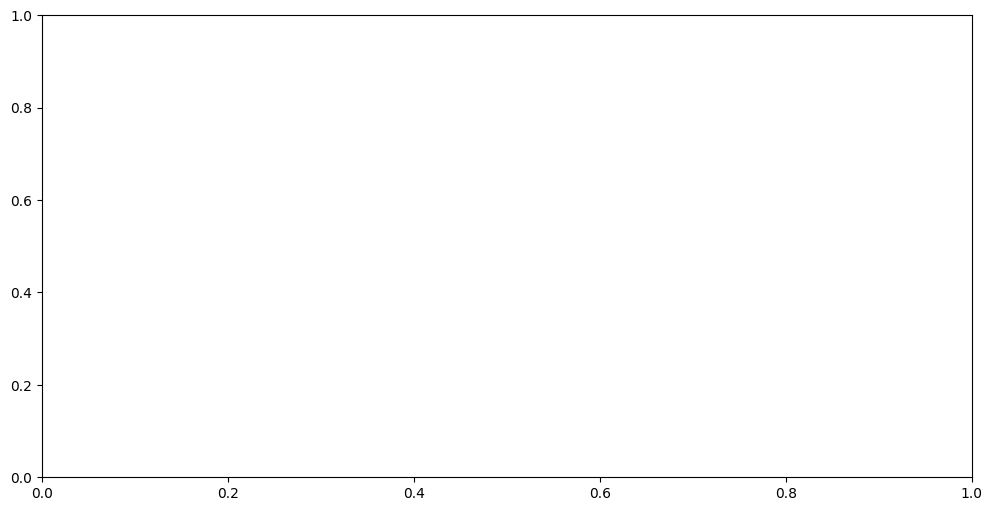

In [69]:
plt.figure(figsize=(12, 6))

# Tracer les données réelles
plt.scatter(X_train, y_train, color='blue', label='Données réelles')

# Tracer les prédictions du modèle
plt.plot(X_train, y_train_pred, color='red', label='Prédictions du modèle')

# Personnalisation du graphique
plt.xlabel('Passengers')
plt.ylabel('month_name')
plt.title('Évolution du modèle de régression linéaire')
plt.legend()

# Afficher le graphique
plt.show()
